In [21]:
#import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import pydicom
import torch 
import torchvision.transforms as transforms
import pandas as pd
from PIL import Image
import cv2
device=torch.device("cuda:0")

In [369]:
mass_x=np.load(r"C:\Users\anis_\Desktop\modèle cancer detection\data saved with numpy\ddsm data set\mass\mass train\x.npy")
calc_x=np.load(r"C:\Users\anis_\Desktop\modèle cancer detection\data saved with numpy\ddsm data set\calcification\train\x.npy")
fin=[]

____________________________BEFORE_PREDICTION__________________________


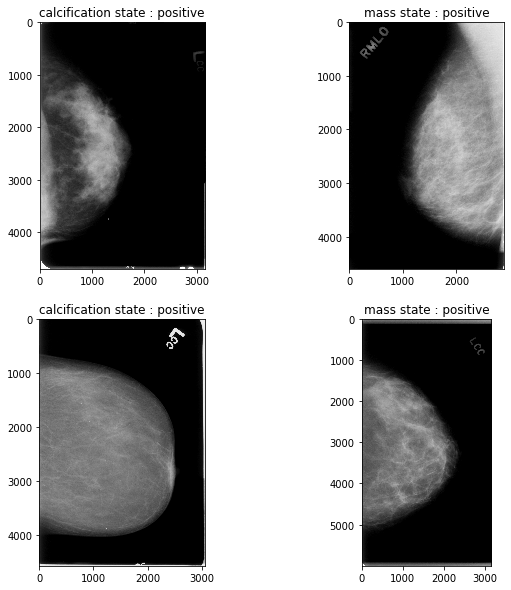

In [366]:
a=195
b=73
c=5
d=100
fig, axes = plt.subplots(2,2, figsize=(10,10))
axes[0][0].imshow(pydicom.read_file(calc_x[a]).pixel_array, cmap='gray')
axes[0][0].set_title("calcification state : positive")
axes[0][1].imshow(pydicom.read_file(mass_x[b]).pixel_array, cmap='gray')
axes[0][1].set_title("mass state : positive")
axes[1][0].imshow(pydicom.read_file(calc_x[c]).pixel_array, cmap='gray')
axes[1][0].set_title("calcification state : positive")
axes[1][1].imshow(pydicom.read_file(mass_x[d]).pixel_array, cmap='gray')
axes[1][1].set_title("mass state : positive")
print("____________________________BEFORE_PREDICTION__________________________")


In [3]:
model = torch.load(r"C:\Users\anis_\Desktop\modèle cancer detection\pytorch\model\model")
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [377]:
image1 = pydicom.read_file(mass_x[100]).pixel_array
image1=np.uint8((image1/65535)*255)
image1=cv2.resize(image1,((image1.shape[1]//299)*299,(image1.shape[0]//299)*299))
tab=[]
indices=[]
for i in range(int(image1.shape[0]//299)):
    for j in range(image1.shape[1]//299):
        cropped=image1[i*299:i*299+299,j*299:j*299+299]
        nb=0
        nb1=0
        for t in range(cropped.shape[0]):
            for tt in range(cropped.shape[1]):
                if cropped[t][tt]<50:
                    nb+=1
                if cropped[t][tt]>230:
                    nb1+=1
        if nb<14000 and nb1<50:
            tab.append(cropped)
            indices.append((i,j))
tab=np.array(tab)
tenser=[]
for image in tab:
    tenser.append(transforms.functional.to_tensor(image).repeat(3,1,1).numpy())
tens=torch.tensor(tenser)
z=model(tens.to(device))
_,yhat=torch.max(z.data,1)
plot=[]
for (i,p)in enumerate(yhat.to("cpu").numpy()):
    if p==1:
        plot.append([_.to("cpu").numpy()[0],i])
if plot!=[]:
    j=plot[np.argmax(plot[:][0])][1]
    sub_image=tab[j]
    print("tumor detected!!!!")
else:
    print("there is no tumor")

tumor detected!!!!


(5980, 2990, 3)
(6060, 3070, 3)


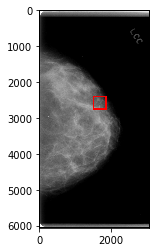

In [378]:
red = [255,0,0]
i,j=indices[j]
sub_image= cv2.cvtColor(sub_image,cv2.COLOR_GRAY2BGR)
constant= cv2.copyMakeBorder(sub_image,40,40,40,40,cv2.BORDER_CONSTANT,value=red)
image1=cv2.cvtColor(image1,cv2.COLOR_GRAY2BGR)
print(image1.shape)
image1=cv2.copyMakeBorder(image1,40,40,40,40,cv2.BORDER_CONSTANT,value=[0,0,0])
print(image1.shape)
f=(299*i)
f1=(299*j)
image1[f:(f+339+40),f1:(f1+339+40)]=constant
plt.imshow(image1)

In [379]:
fin.append(image1)

____________________________AFTER_PREDICTION__________________________


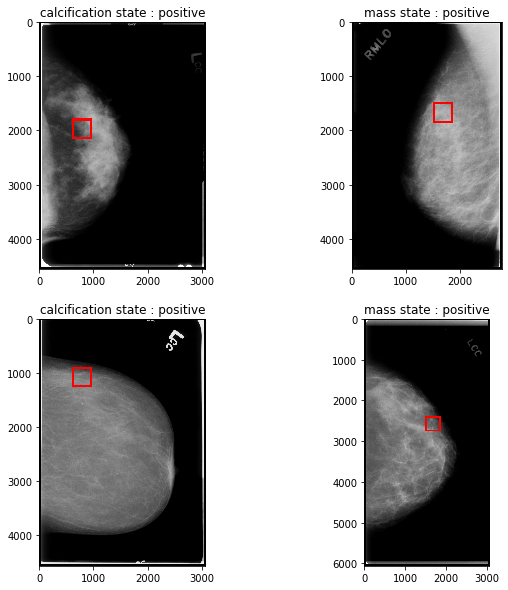

In [380]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
axes[0][0].imshow(fin[0], cmap='gray')
axes[0][0].set_title("calcification state : positive")
axes[0][1].imshow(fin[1], cmap='gray')
axes[0][1].set_title("mass state : positive")
axes[1][0].imshow(fin[2], cmap='gray')
axes[1][0].set_title("calcification state : positive")
axes[1][1].imshow(fin[3], cmap='gray')
axes[1][1].set_title("mass state : positive")
print("____________________________AFTER_PREDICTION__________________________")